## 1. Nhập bộ dữ liệu

In [1]:
!pip install gdown==v4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


In [2]:
import gdown
!mkdir -p content/data
# Download all files
file_ids = [
    '1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8',  # X_train
    '1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT',  # X_test
    '1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y',  # y_train
    '1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv'   # y_test
]

file_paths = [
    'content/data/X_train.csv',
    'content/data/X_test.csv',
    'content/data/y_train.csv',
    'content/data/y_test.csv'
]
for file_id, file_path in zip(file_ids, file_paths):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8
To: /content/content/data/X_train.csv
100%|██████████| 5.03M/5.03M [00:00<00:00, 32.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT
To: /content/content/data/X_test.csv
100%|██████████| 1.34M/1.34M [00:00<00:00, 11.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y
To: /content/content/data/y_train.csv
100%|██████████| 16.9k/16.9k [00:00<00:00, 38.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv
To: /content/content/data/y_test.csv
100%|██████████| 4.24k/4.24k [00:00<00:00, 16.8MB/s]


In [5]:
import pandas as pd

# Đọc dữ liệu
X_train = pd.read_csv('content/data/X_train.csv', header=0, keep_default_na=False)
X_test = pd.read_csv('content/data/X_test.csv', header=0, keep_default_na=False)
y_train = pd.read_csv('content/data/y_train.csv', header=0, keep_default_na=False)
y_test = pd.read_csv('content/data/y_test.csv', header=0, keep_default_na=False)

# Đảm bảo các cột đều là Series
X_train = X_train.squeeze()
X_test = X_test.squeeze()
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Nối lại
X_all = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y_all = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

# Gộp thành một DataFrame duy nhất
df = pd.DataFrame({'message': X_all, 'category': y_all})

print(df.head())
print(df.shape)

                                             message  category
0                        seems unnecessarily hostile         0
1  url httpwwwnewsisfreecomclick38688977215 date ...         0
2                                              empty         0
3  animal russian etc jules point animacy grammar...         0
4  q 3 comparison hi louise comparison first two ...         0
(10572, 2)


## 2. Kiểm tra số lượng các nhãn

category
0    7828
1    2744
Name: count, dtype: int64


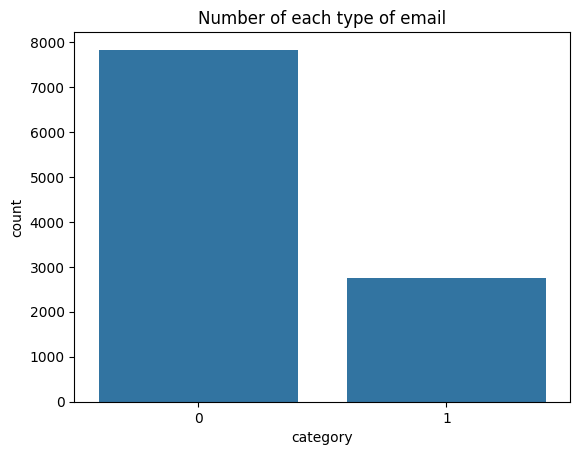

In [26]:
print(df['category'].value_counts())

# Biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='category', data=df)
plt.title("Number of each type of email")
plt.show()


## 3. Phân phối độ dài các email

count    10572.000000
mean       600.468123
std       1833.412738
min          0.000000
25%         34.000000
50%        108.000000
75%        537.250000
max      63641.000000
Name: message_length, dtype: float64


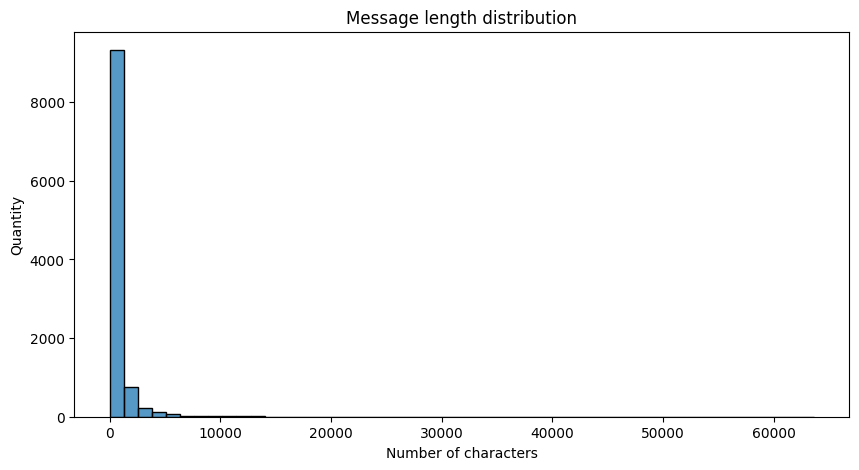

In [25]:
df1 = df.copy()
df1['message_length'] = df['message'].apply(len)

# Thống kê mô tả
print(df1['message_length'].describe())

# Vẽ histogram
plt.figure(figsize=(10, 5))
sns.histplot(df1['message_length'], bins=50)
plt.title("Message length distribution")
plt.xlabel("Number of characters")
plt.ylabel("Quantity")
plt.show()


## 5. Word Frequency & Word Cloud

<ipython-input-13-c5a76ea92981>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette=color)


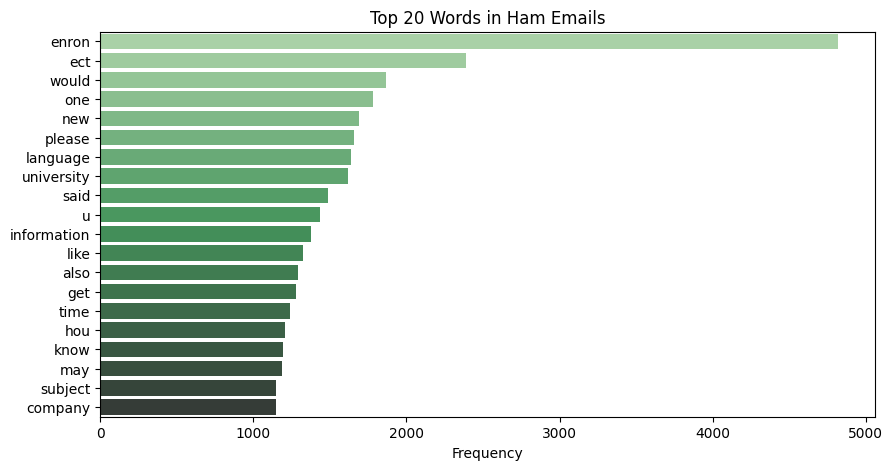

<ipython-input-13-c5a76ea92981>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette=color)


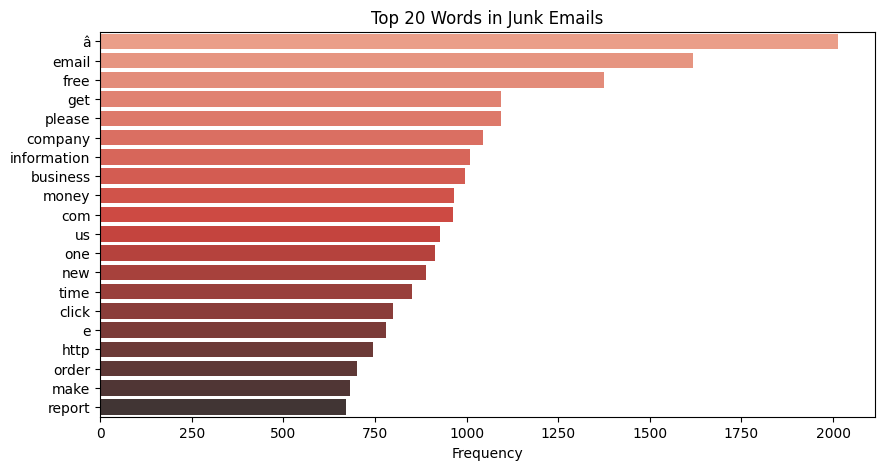

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Giả sử df có cột 'message' và 'category' (ham/junk)
df.dropna(subset=['message', 'category'], inplace=True)
df['category'] = df['category'].astype(str)
df['message'] = df['message'].astype(str)

def clean_and_tokenize(text):
    tokens = text.lower().split()
    return [word for word in tokens if word.isalpha()]

df['tokens'] = df['message'].apply(clean_and_tokenize)

ham_words = [word for tokens in df[df['category']=='0']['tokens'] for word in tokens]
junk_words = [word for tokens in df[df['category']=='1']['tokens'] for word in tokens]

ham_freq = Counter(ham_words)
junk_freq = Counter(junk_words)

# Plot top 20 words for each
def plot_top_words(counter, title, color):
    common = counter.most_common(20)
    words, freqs = zip(*common)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(freqs), y=list(words), palette=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()

plot_top_words(ham_freq, 'Top 20 Words in Ham Emails', 'Greens_d')
plot_top_words(junk_freq, 'Top 20 Words in Junk Emails', 'Reds_d')

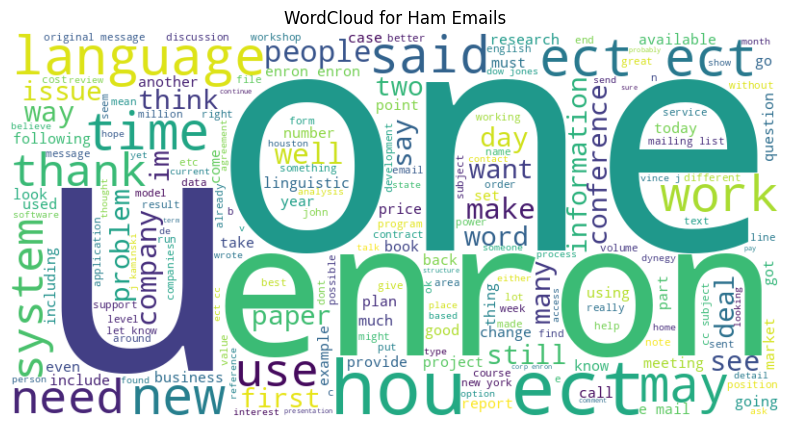

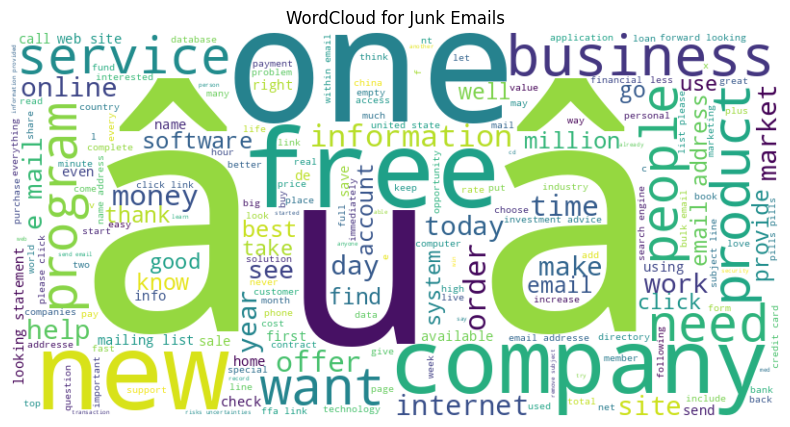

In [20]:
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(ham_words, "WordCloud for Ham Emails")
generate_wordcloud(junk_words, "WordCloud for Junk Emails")

## 6. Phân phối số lượng từ trong mỗi email

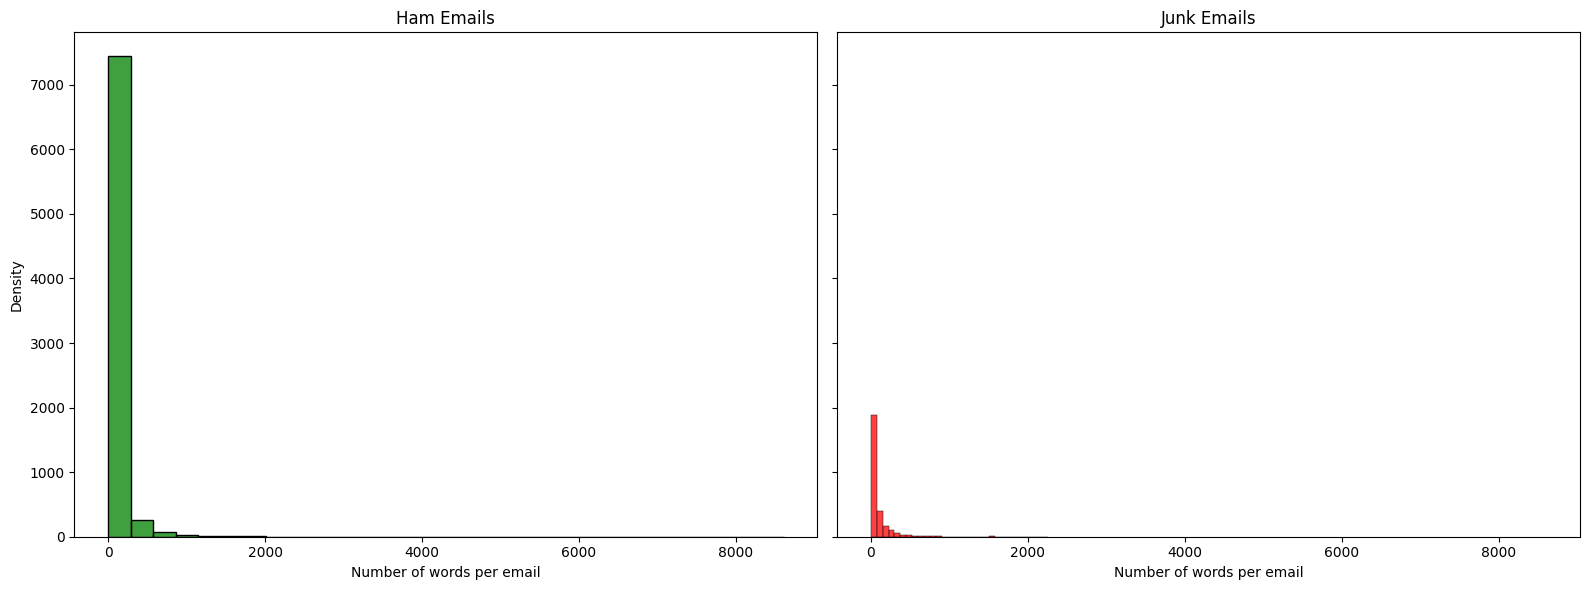

In [18]:
# Đếm số lượng từ trên mỗi email (dùng cột tokens đã có)
df['num_words'] = df['tokens'].apply(len)

# Tạo 2 tập dữ liệu theo nhãn
ham_lengths = df[df['category'] == '0']['num_words']
junk_lengths = df[df['category'] == '1']['num_words']

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

sns.histplot(ham_lengths, ax=axes[0], color='green', bins=30)
axes[0].set_title("Ham Emails")
axes[0].set_xlabel("Number of words per email")
axes[0].set_ylabel("Density")

sns.histplot(junk_lengths, ax=axes[1], color='red', bins=30)
axes[1].set_title("Junk Emails")
axes[1].set_xlabel("Number of words per email")

plt.tight_layout()
plt.show()

## 7. Trung bình độ dài email

In [24]:
# Thêm cột số từ trong mỗi email
df['word_count'] = df['message'].apply(lambda x: len(str(x).split()))

# Tính độ dài trung bình cho từng loại
overall_avg = df['word_count'].mean()
ham_avg = df[df['category'] == '0']['word_count'].mean()
junk_avg = df[df['category'] == '1']['word_count'].mean()

print(f"Độ dài trung bình tất cả email: {overall_avg:.2f} từ")
print(f"Độ dài trung bình email ham: {ham_avg:.2f} từ")
print(f"Độ dài trung bình email junk: {junk_avg:.2f} từ")

Độ dài trung bình tất cả email: 86.54 từ
Độ dài trung bình email ham: 77.74 từ
Độ dài trung bình email junk: 111.64 từ
